In [1]:
!pip install kmapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.1 MB/s eta 0:00:00


In [2]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.8 MB/s eta 0:00:00


In [3]:
!pip install giotto-tda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.4/526.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00


In [4]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from kmapper.plotlyviz import plotlyviz
import networkx as nx
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import kmapper
import sklearn
from gtda.diagrams import PersistenceEntropy
from gtda.plotting import plot_heatmap, plot_point_cloud, plot_diagram
from gtda.mapper import plot_static_mapper_graph, Eccentricity
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter,
    Entropy
)
import pandas as pd
import random
import igraph as ig
from scipy import stats
import copy
import plotly.graph_objects as go

In [5]:
import networkx as nx

In [6]:
from IPython.display import Markdown, display

def printmd(string):
  display(Markdown(string))

In [8]:
X

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [9]:
X_train = np.zeros((600, 50))
N_samples = 150
for j in range(N_samples):
  for i in range(len(X)):
    X_train[j][i] = -X[i] + 1 + random.normalvariate(0,0.05)
    X_train[j+N_samples][i] = X[i] + random.normalvariate(0,0.05)
    X_train[j+2*N_samples][i] = X[i]**2 + random.normalvariate(0,0.05)
    X_train[j+3*N_samples][i] = -X[i]**2 + 1 + random.normalvariate(0,0.05)

In [10]:
X_train.shape

(600, 50)

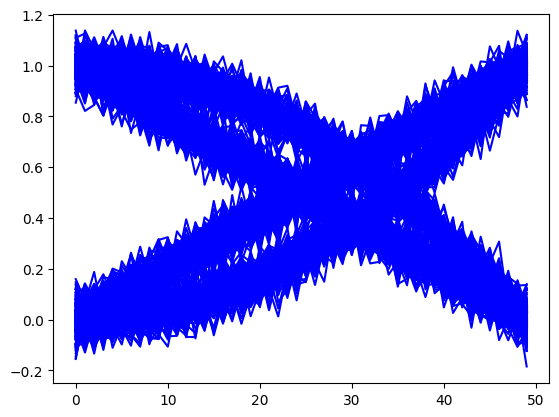

In [11]:
for x in X_train:
  plt.plot(x, color="blue")
plt.show()

In [12]:
Y = []
for i in range(len(X_train)):
  if i < 300:
    Y.append([1, 0])
  else:
    Y.append([0, 1])

In [13]:
Y_train = np.array(Y)

In [14]:
X_train = X_train.reshape(600, 1, 50)

In [15]:
n_epochs = 100

In [8]:
def class_samples(cl: int, Y_values):
    cl_samples_ids = []
    for i, ele in enumerate(Y_values):
        if ele[cl-1] == 1:
            cl_samples_ids.append(i)
    return cl_samples_ids

def find_all_nodes(idss: list):
    nodes = []
    for i, ele in enumerate(graph.vs['node_elements']):
        if any(j in ele for j in idss):
            nodes.append(i)
    return np.array(nodes)

def find_all_neg_nodes(idss):
    neg_nodes = []
    for i, ele in enumerate(graph.vs['node_elements']):
        if not any(j in ele for j in idss):
            neg_nodes.append(i)
    return np.array(neg_nodes)

def count_node_class(node):
    count_1, count_2 = 0, 0
    for point in node:
        if y_train[point][0]==1:
            count_1 += 1
        else:
            count_2 += 1
    max_count = max([count_1, count_2])
    if max_count == count_1:
        return "red"
    elif max_count == count_2:
        return "blue"
def count_node_probs(node):
  count_1, count_2 = 0, 0
  for point in node:
    if y_train[point][0] == 1:
      count_1 += 1
    else:
      count_2 += 1
  result = [count_1/len(node), count_2/len(node)]
  return result

def find_common_points_color(edge, pipe_graph):
    points_list = [node for node in pipe_graph.vs['node_elements'][edge[0]] if node in pipe_graph.vs['node_elements'][edge[1]]]
    return count_node_class(points_list)

In [9]:
def count_class_destr(node):
  count_1, count_2 = 0, 0
  for ele in node:
    if y_train[ele][0] == 1:
      count_1 += 1
    else:
      count_2 += 1
  return count_1/len(node)

In [18]:
color_data = Y
pipe = make_mapper_pipeline(filter_func=Entropy(),
                                            cover=CubicalCover(n_intervals=10, overlap_frac=0.1),
                                            clusterer=DBSCAN(),
                                            verbose=False
                                           )
graph = pipe.fit_transform(X_train.reshape(X_train.shape[0], X_train.shape[-1]), Y_train)
G = graph.to_networkx()
ColorLegend = {"Normal":'r', "Abnormal":'b'}
nx.draw(G, node_size=50, node_color=[count_node_class(node) for node in graph.vs['node_elements']])
for label in ColorLegend:
  ax.plot([0],[0], color=ColorLegend[label],label=label)
ax.legend()


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning: Negative values detected in X! Taking absolute value to calculate probabilities.
  warnings.warn("Negative values detected in X! Taking absolute "


NameError: name 'y_train' is not defined

In [22]:
G.nodes.data()

NodeDataView({0: {'pullback_set_label': 5, 'partial_cluster_label': 0, 'node_elements': array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  22,  23,  24,  25,  26,  27,
        28,  30,  31,  32,  34,  35,  36,  37,  38,  40,  41,  43,  44,
        45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  77,  79,  80,  82,  83,  84,  85,  86,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  99, 100, 103, 104,
       105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 145, 146, 147,
       148, 149]), '_igraph_index': 0}, 1: {'pullback_set_label': 6, 'partial_cluster_label': 0, 'node_elements': array([  2,   8,  10,  13,  15,  20,  25,  29,  33,  39,  46,  71,  76,
      

In [23]:
pos = nx.multipartite_layout(G, subset_key="partial_cluster_label")

In [10]:
def create_nodenedge_traces(Graph, pos):
  size = [len(Graph.nodes()[i]['node_elements']) for i in range(len(Graph.nodes()))]
  for i in range(len(size)):
    if size[i] > 1:
      size[i] = size[i]/ math.log(size[i], 2.5)
  node_x = []
  node_y = []
  for node in Graph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
  edge_x = []
  edge_y = []
  for edge in Graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

  edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

  node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        line = dict(color='black'),
        showscale=True,
        coloraxis = "coloraxis",
        color=[],
        size=size,
        line_width=2))
  node_adjacencies = []
  node_text = []
  for i in range(len(Graph.nodes())):
    node_adjacencies.append(count_class_destr(Graph.nodes.data()[i]['node_elements']))
    node_text.append('# 1 class elements: '+str(count_class_destr(Graph.nodes.data()[i]['node_elements']))
    + f'<br>Size = {len(Graph.nodes.data()[i]["node_elements"])}<br>Node id: {i}')

  node_trace.marker.color = node_adjacencies
  node_trace.text = node_text

  return edge_trace, node_trace

In [11]:
name = [f'p_{i}' for i in range(187)]
name.append('class')
print(name)

['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9', 'p_10', 'p_11', 'p_12', 'p_13', 'p_14', 'p_15', 'p_16', 'p_17', 'p_18', 'p_19', 'p_20', 'p_21', 'p_22', 'p_23', 'p_24', 'p_25', 'p_26', 'p_27', 'p_28', 'p_29', 'p_30', 'p_31', 'p_32', 'p_33', 'p_34', 'p_35', 'p_36', 'p_37', 'p_38', 'p_39', 'p_40', 'p_41', 'p_42', 'p_43', 'p_44', 'p_45', 'p_46', 'p_47', 'p_48', 'p_49', 'p_50', 'p_51', 'p_52', 'p_53', 'p_54', 'p_55', 'p_56', 'p_57', 'p_58', 'p_59', 'p_60', 'p_61', 'p_62', 'p_63', 'p_64', 'p_65', 'p_66', 'p_67', 'p_68', 'p_69', 'p_70', 'p_71', 'p_72', 'p_73', 'p_74', 'p_75', 'p_76', 'p_77', 'p_78', 'p_79', 'p_80', 'p_81', 'p_82', 'p_83', 'p_84', 'p_85', 'p_86', 'p_87', 'p_88', 'p_89', 'p_90', 'p_91', 'p_92', 'p_93', 'p_94', 'p_95', 'p_96', 'p_97', 'p_98', 'p_99', 'p_100', 'p_101', 'p_102', 'p_103', 'p_104', 'p_105', 'p_106', 'p_107', 'p_108', 'p_109', 'p_110', 'p_111', 'p_112', 'p_113', 'p_114', 'p_115', 'p_116', 'p_117', 'p_118', 'p_119', 'p_120', 'p_121', 'p_122', 'p

In [12]:
data_ab = pd.read_csv('/content/drive/MyDrive/ptbdb_n_a/ptbdb_abnormal.csv', names=name)
data_norm = pd.read_csv('/content/drive/MyDrive/ptbdb_n_a/ptbdb_normal.csv', names=name)

data_ab_new = data_ab[0:500]
data_norm_new = data_norm[0:500]
data_test_ab = data_ab[500:1000]
data_test_norm = data_norm[500:1000]
data = pd.concat([data_ab_new, data_norm_new])
data_test = pd.concat([data_test_ab, data_test_norm])
data

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_178,p_179,p_180,p_181,p_182,p_183,p_184,p_185,p_186,class
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.964328,0.545779,0.158541,0.081252,0.137138,0.185097,0.165279,0.163694,0.156163,0.158145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,1.000000,0.572891,0.378589,0.193412,0.200089,0.218562,0.220788,0.217672,0.215669,0.222568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.948656,0.856799,0.420778,0.129964,0.042118,0.020858,0.034497,0.031288,0.024870,0.032892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.961211,0.505968,0.142796,0.000000,0.095482,0.187553,0.226769,0.234442,0.243393,0.250639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X = np.array(data.drop('class', axis=1))
Y = []
for i in data['class']:
    if i == 0:
        Y.append([1, 0])
    else:
        Y.append([0, 1])

In [14]:
Y = np.array(Y)
X = X.reshape((X.shape[0], 1, X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [15]:
Y[499]

array([0, 1])

In [17]:
G.nodes.data()

NameError: name 'G' is not defined

In [16]:
fig = go.Figure(data=create_nodenedge_traces(G, pos),
             layout=go.Layout(
                title='Test',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

NameError: name 'G' is not defined

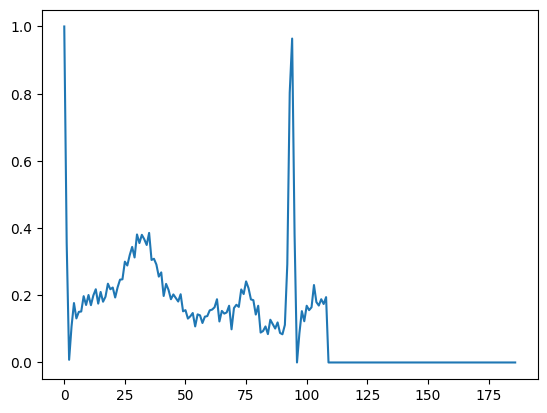

In [54]:
plt.plot(X_train[22][0])

In [53]:
y_train[22]

array([0, 1])

In [18]:
n_epochs = 150

In [19]:
graphs = {}
poses = {}

In [23]:
class PlotlyMapper(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if epoch%30 == 0 or epoch in (2, 5, 10, 15):
      graphs[f'E {epoch}'] = {}
      poses[f'E {epoch}'] = {}
      for l in list_of_layers1:
        layer_output = K.function([model.layers[0].input],
                                    [model.get_layer(l).output])
        layer_output = layer_output([X_train])[0]
        print(layer_output.shape)
        pipe = make_mapper_pipeline(filter_func=Entropy(),
                                    cover=CubicalCover(n_intervals=10, overlap_frac=0.2),
                                    clusterer=DBSCAN(),
                                    verbose=False
                                    )
        data = layer_output
        graph = pipe.fit_transform(data.reshape(data.shape[0], data.shape[-1]))
        graph1 = copy.copy(graph)
        ids = []
        for i in range(len(graph.vs['node_elements'])):
          pk = count_node_probs(graph.vs['node_elements'][i])
          H = stats.entropy(pk)
          if H > 0.6:
            ids.append(i)
        graph1.delete_vertices(ids)
        G = graph.to_networkx()
        G1 = graph1.to_networkx()
        graphs[f'E {epoch}'][f'Layer {l}'] = G
        pos_0 = nx.multipartite_layout(G, subset_key="pullback_set_label")
        pos_1 = nx.multipartite_layout(G1, subset_key="pullback_set_label")
        poses[f'E {epoch}'][f'Layer {l}'] = pos_0
        fig1 = go.Figure(data=create_nodenedge_traces(G, pos_0),
             layout=go.Layout(
                title=f'Not sorted {l} ',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                coloraxis = {'colorscale':'viridis',
                             'colorbar':{'title':'1 class elements', 'xanchor':'left', 'titleside':'right'}})
                )
        fig2 = go.Figure(data=create_nodenedge_traces(G1, pos_1),
             layout=go.Layout(
                title=f'Sorted {l}',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                coloraxis = {'colorscale':'viridis',
                             'colorbar':{'title':'1 class elements', 'xanchor':'left', 'titleside':'right'}})
                )
        fig1.show()
        fig2.show()


In [21]:
tf.config.run_functions_eagerly(True)

In [26]:
model = Sequential([
    LSTM(12, input_shape=(X_train.shape[1], X_train.shape[-1])
    , return_sequences=True, name = 'lstm_1'
         ),
    LSTM(12, name='lstm_2'),
    Dense(12, activation='softmax', name='dense_1'),
    Dense(2, activation='softmax', name='Output')
])
list_of_layers1 = [layer.name for layer in model.layers]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=n_epochs
          , callbacks=[PlotlyMapper()]
          )

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



13/13 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.5000(800, 1, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


(800, 2)


13/13 [==============================] - 1s 83ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 2/150
13/13 [==============================] - 1s 42ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 3/150
12/13 [==========================>...] - ETA: 0s - loss: 0.6928 - accuracy: 0.5000(800, 1, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


(800, 2)


13/13 [==============================] - 1s 64ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 4/150
13/13 [==============================] - 1s 44ms/step - loss: 0.6917 - accuracy: 0.5750
Epoch 5/150
13/13 [==============================] - 1s 42ms/step - loss: 0.6898 - accuracy: 0.6662
Epoch 6/150
12/13 [==========================>...] - ETA: 0s - loss: 0.6868 - accuracy: 0.6823(800, 1, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


(800, 2)


13/13 [==============================] - 1s 66ms/step - loss: 0.6867 - accuracy: 0.6812
Epoch 7/150
13/13 [==============================] - 1s 51ms/step - loss: 0.6821 - accuracy: 0.6875
Epoch 8/150
13/13 [==============================] - 1s 62ms/step - loss: 0.6764 - accuracy: 0.7113
Epoch 9/150
13/13 [==============================] - 1s 63ms/step - loss: 0.6691 - accuracy: 0.7237
Epoch 10/150
13/13 [==============================] - 1s 45ms/step - loss: 0.6607 - accuracy: 0.7350
Epoch 11/150
13/13 [==============================] - ETA: 0s - loss: 0.6505 - accuracy: 0.7550(800, 1, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


(800, 2)


13/13 [==============================] - 1s 66ms/step - loss: 0.6505 - accuracy: 0.7550
Epoch 12/150
13/13 [==============================] - 1s 44ms/step - loss: 0.6402 - accuracy: 0.7663
Epoch 13/150
13/13 [==============================] - 1s 45ms/step - loss: 0.6294 - accuracy: 0.7675
Epoch 14/150
13/13 [==============================] - 1s 44ms/step - loss: 0.6181 - accuracy: 0.7788
Epoch 15/150
13/13 [==============================] - 1s 45ms/step - loss: 0.6073 - accuracy: 0.7862
Epoch 16/150
13/13 [==============================] - ETA: 0s - loss: 0.5975 - accuracy: 0.7937(800, 1, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


(800, 2)


13/13 [==============================] - 1s 66ms/step - loss: 0.5975 - accuracy: 0.7937
Epoch 17/150
13/13 [==============================] - 1s 45ms/step - loss: 0.5871 - accuracy: 0.7962
Epoch 18/150
13/13 [==============================] - 1s 41ms/step - loss: 0.5782 - accuracy: 0.7975
Epoch 19/150
13/13 [==============================] - 1s 43ms/step - loss: 0.5690 - accuracy: 0.8012
Epoch 20/150
13/13 [==============================] - 1s 43ms/step - loss: 0.5620 - accuracy: 0.7962
Epoch 21/150
13/13 [==============================] - 1s 45ms/step - loss: 0.5543 - accuracy: 0.8000
Epoch 22/150
13/13 [==============================] - 1s 43ms/step - loss: 0.5444 - accuracy: 0.8087
Epoch 23/150
13/13 [==============================] - 1s 45ms/step - loss: 0.5366 - accuracy: 0.8062
Epoch 24/150
13/13 [==============================] - 1s 42ms/step - loss: 0.5301 - accuracy: 0.8087
Epoch 25/150
13/13 [==============================] - 1s 46ms/step - loss: 0.5210 - accuracy: 0.8200
Epo

/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


(800, 2)


13/13 [==============================] - 1s 66ms/step - loss: 0.4885 - accuracy: 0.8363
Epoch 32/150
13/13 [==============================] - 1s 44ms/step - loss: 0.4830 - accuracy: 0.8363
Epoch 33/150
13/13 [==============================] - 1s 43ms/step - loss: 0.4809 - accuracy: 0.8325
Epoch 34/150
13/13 [==============================] - 1s 45ms/step - loss: 0.4769 - accuracy: 0.8338
Epoch 35/150
13/13 [==============================] - 1s 45ms/step - loss: 0.4713 - accuracy: 0.8400
Epoch 36/150
13/13 [==============================] - 1s 46ms/step - loss: 0.4677 - accuracy: 0.8400
Epoch 37/150
13/13 [==============================] - 1s 42ms/step - loss: 0.4659 - accuracy: 0.8450
Epoch 38/150
13/13 [==============================] - 1s 43ms/step - loss: 0.4609 - accuracy: 0.8425
Epoch 39/150
13/13 [==============================] - 1s 44ms/step - loss: 0.4628 - accuracy: 0.8400
Epoch 40/150
13/13 [==============================] - 1s 44ms/step - loss: 0.4583 - accuracy: 0.8462
Epo

/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


(800, 2)


13/13 [==============================] - 1s 72ms/step - loss: 0.4111 - accuracy: 0.8625
Epoch 62/150
13/13 [==============================] - 1s 47ms/step - loss: 0.4100 - accuracy: 0.8625
Epoch 63/150
13/13 [==============================] - 1s 44ms/step - loss: 0.4081 - accuracy: 0.8625
Epoch 64/150
13/13 [==============================] - 1s 62ms/step - loss: 0.4130 - accuracy: 0.8550
Epoch 65/150
13/13 [==============================] - 1s 60ms/step - loss: 0.4107 - accuracy: 0.8550
Epoch 66/150
13/13 [==============================] - 1s 63ms/step - loss: 0.4086 - accuracy: 0.8550
Epoch 67/150
13/13 [==============================] - 1s 44ms/step - loss: 0.4030 - accuracy: 0.8637
Epoch 68/150
13/13 [==============================] - 1s 45ms/step - loss: 0.4013 - accuracy: 0.8637
Epoch 69/150
13/13 [==============================] - 1s 43ms/step - loss: 0.3996 - accuracy: 0.8650
Epoch 70/150
13/13 [==============================] - 1s 46ms/step - loss: 0.3969 - accuracy: 0.8650
Epo

/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


(800, 2)


13/13 [==============================] - 1s 72ms/step - loss: 0.3708 - accuracy: 0.8813
Epoch 92/150
13/13 [==============================] - 1s 47ms/step - loss: 0.3703 - accuracy: 0.8775
Epoch 93/150
13/13 [==============================] - 1s 46ms/step - loss: 0.3702 - accuracy: 0.8775
Epoch 94/150
13/13 [==============================] - 1s 46ms/step - loss: 0.3672 - accuracy: 0.8800
Epoch 95/150
13/13 [==============================] - 1s 45ms/step - loss: 0.3664 - accuracy: 0.8825
Epoch 96/150
13/13 [==============================] - 1s 48ms/step - loss: 0.3674 - accuracy: 0.8800
Epoch 97/150
13/13 [==============================] - 1s 48ms/step - loss: 0.3657 - accuracy: 0.8813
Epoch 98/150
13/13 [==============================] - 1s 46ms/step - loss: 0.3656 - accuracy: 0.8800
Epoch 99/150
13/13 [==============================] - 1s 45ms/step - loss: 0.3638 - accuracy: 0.8825
Epoch 100/150
13/13 [==============================] - 1s 46ms/step - loss: 0.3627 - accuracy: 0.8825
Ep

/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


/usr/local/lib/python3.10/dist-packages/gtda/mapper/filter.py:171: UserWarning:

Negative values detected in X! Taking absolute value to calculate probabilities.



(800, 12)


(800, 2)


13/13 [==============================] - 1s 83ms/step - loss: 0.3496 - accuracy: 0.8875
Epoch 122/150
13/13 [==============================] - 1s 61ms/step - loss: 0.3498 - accuracy: 0.8875
Epoch 123/150
13/13 [==============================] - 1s 69ms/step - loss: 0.3480 - accuracy: 0.8875
Epoch 124/150
13/13 [==============================] - 1s 44ms/step - loss: 0.3474 - accuracy: 0.8875
Epoch 125/150
13/13 [==============================] - 1s 46ms/step - loss: 0.3512 - accuracy: 0.8800
Epoch 126/150
13/13 [==============================] - 1s 49ms/step - loss: 0.3475 - accuracy: 0.8863
Epoch 127/150
13/13 [==============================] - 1s 43ms/step - loss: 0.3458 - accuracy: 0.8875
Epoch 128/150
13/13 [==============================] - 1s 46ms/step - loss: 0.3443 - accuracy: 0.8900
Epoch 129/150
13/13 [==============================] - 1s 47ms/step - loss: 0.3442 - accuracy: 0.8888
Epoch 130/150
13/13 [==============================] - 1s 45ms/step - loss: 0.3430 - accuracy: 0

In [43]:
fig1 = go.Figure(data=create_nodenedge_traces(graphs['E 0']['Layer Output'], poses['E 0']['Layer lstm_1']),
             layout=go.Layout(
                title='Test',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig1.show()

In [35]:
def find_nodes(data, node):
  l = []
  for ele in data:
    if any(item in node['node_elements'] for item in ele[-1]['node_elements']):
      l.append([ele[0], len(np.intersect1d(ele[-1]['node_elements'], node['node_elements']))])
  if len(l) >= 3:
    res = dict(sorted(l, key=lambda x:x[1], reverse=True)[0:3])
  else:
    res = dict(l)
  return res

In [38]:
find_nodes(graphs['E 15']['Layer lstm_2'].nodes.data(), graphs['E 15']['Layer lstm_1'].nodes.data()[8])

{2: 2, 3: 1, 5: 1}

In [28]:
graph = graphs['E 15']['Layer lstm_2']
fig1 = go.Figure(data=create_nodenedge_traces(graph, poses['E 15']['Layer lstm_2']),
                layout=go.Layout(
                  title='Output',
                  titlefont_size=16,
                  showlegend=False,
                  hovermode='closest',
                  margin=dict(b=20,l=5,r=5,t=40),
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
nodes = find_nodes(graph.nodes.data(), graphs['E 15']['Layer lstm_1'].nodes.data()[7])
node_x = []
node_y = []
size = []
for node in nodes.keys():
  x, y = poses['E 15']['Layer lstm_2'][node]
  node_x.append(x)
  node_y.append(y)
  size.append(len(graph.nodes.data()[node]['node_elements']))
for i in range(len(size)):
  if size[i] > 1:
    size[i] = size[i]/ math.log(size[i], 2.5)
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        symbol='circle-open',
        size = size,
        color='red'
        ),
    marker_line_width=4)
node_text = []
for i in nodes.keys():
  node_text.append('# 1 class elements: '+str(count_class_destr(graph.nodes.data()[i]['node_elements']))
  + f'<br>Size = {len(graph.nodes.data()[i]["node_elements"])}<br>Elements count:{nodes[i]}<br>Node id: {i}')
node_trace.text = node_text
fig1.add_trace(node_trace)
fig1.show()

In [39]:
def create_selected_nodes_traces(graph1, graph2, poses, selected_node, l):
  nodes = find_nodes(graph2.nodes.data(), graph1.nodes.data()[selected_node])
  node_x = []
  node_y = []
  size = []
  if l != 'lstm_1':
    for node in nodes.keys():
      x, y = poses[f'Layer {l}'][node]
      node_x.append(x)
      node_y.append(y)
      size.append(len(graph2.nodes.data()[node]['node_elements']))
  else:
    x, y = poses[f'Layer {l}'][selected_node]
    node_x.append(x)
    node_y.append(y)
    size.append(len(graph1.nodes.data()[selected_node]['node_elements']))
  for i in range(len(size)):
    if size[i] > 1:
      size[i] = size[i]/ math.log(size[i], 2.5)
  node_trace = go.Scatter(
      visible=False,
      x=node_x, y=node_y,
      mode='markers',
      hoverinfo='text',
      marker=dict(
          symbol='circle-open',
          size = size,
          color='red'
          ),
      marker_line_width=4)
  node_text = []
  if l!= 'lstm_1':
    for i in nodes.keys():
      node_text.append('# 1 class elements: '+str(count_class_destr(graph2.nodes.data()[i]['node_elements']))
      + f'<br>Size = {len(graph2.nodes.data()[i]["node_elements"])}<br>Elements count:{nodes[i]}<br>Node id: {i}')
  else:
    node_text.append('# 1 class elements: '+str(count_class_destr(graph1.nodes.data()[selected_node]['node_elements']))
    + f'<br>Size = {len(graph2.nodes.data()[selected_node]["node_elements"])}<br>Node id: {selected_node}')
  node_trace.text = node_text
  return node_trace

In [40]:
def create_selected_nodes_traces_epochs(graph1, graph2, poses, selected_node, e, l):
  nodes = find_nodes(graph2.nodes.data(), graph1.nodes.data()[selected_node])
  node_x = []
  node_y = []
  size = []
  if e != 'E 0':
    for node in nodes.keys():
      x, y = poses[e][l][node]
      node_x.append(x)
      node_y.append(y)
      size.append(len(graph2.nodes.data()[node]['node_elements']))
  else:
    x, y = poses[e][l][selected_node]
    node_x.append(x)
    node_y.append(y)
    size.append(len(graph1.nodes.data()[selected_node]['node_elements']))
  for i in range(len(size)):
    if size[i] > 1:
      size[i] = size[i]/ math.log(size[i], 2.5)
  node_trace = go.Scatter(
      visible=False,
      x=node_x, y=node_y,
      mode='markers',
      hoverinfo='text',
      marker=dict(
          symbol='circle-open',
          size = size,
          color='red'
          ),
      marker_line_width=4)
  node_text = []
  if e != 'E 1':
    for i in nodes.keys():
      node_text.append('# 1 class elements: '+str(count_class_destr(graph2.nodes.data()[i]['node_elements']))
      + f'<br>Size = {len(graph2.nodes.data()[i]["node_elements"])}<br>Elements count:{nodes[i]}<br>Node id: {i}')
  else:
    node_text.append('# 1 class elements: '+str(count_class_destr(graph1.nodes.data()[selected_node]['node_elements']))
    + f'<br>Size = {len(graph2.nodes.data()[selected_node]["node_elements"])}<br>Node id: {selected_node}')
  node_trace.text = node_text
  return node_trace

In [41]:
graphs1 = graphs['E 120']
poses1 = poses['E 120']

In [85]:
poses1

{'Layer lstm_1': {22: array([-1.,  0.]),
  20: array([-0.8203125,  0.       ]),
  17: array([-0.640625  , -0.08984375]),
  6: array([-0.640625  ,  0.08984375]),
  16: array([-0.4609375 , -0.08984375]),
  7: array([-0.4609375 ,  0.08984375]),
  19: array([-0.28125   , -0.08984375]),
  8: array([-0.28125   ,  0.08984375]),
  10: array([-0.1015625 , -0.08984375]),
  4: array([-0.1015625 ,  0.08984375]),
  13: array([ 0.078125 , -0.1796875]),
  12: array([0.078125, 0.      ]),
  0: array([0.078125 , 0.1796875]),
  11: array([ 0.2578125, -0.1796875]),
  3: array([0.2578125, 0.       ]),
  1: array([0.2578125, 0.1796875]),
  15: array([ 0.4375   , -0.1796875]),
  9: array([0.4375, 0.    ]),
  2: array([0.4375   , 0.1796875]),
  21: array([ 0.6171875 , -0.26953125]),
  18: array([ 0.6171875 , -0.08984375]),
  14: array([0.6171875 , 0.08984375]),
  5: array([0.6171875 , 0.26953125])},
 'Layer lstm_2': {14: array([-1.,  0.]),
  15: array([-0.82022472,  0.        ]),
  4: array([-0.64044944,  0.

In [42]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.5, 0.5],
    row_heights=[0.6, 0.6],
    subplot_titles=('Layer lstm_1', 'Layer lstm_2', 'Layer dense_1', 'Layer Output'))
rowscols = [[1,1], [1,2], [2,1], [2,2]]
for i, l in enumerate(list_of_layers1):
  fig.add_trace(trace=create_nodenedge_traces(graphs1[f'Layer {l}'], poses1[f'Layer {l}'])[0], row=rowscols[i][0], col=rowscols[i][1])
  fig.add_trace(trace=create_nodenedge_traces(graphs1[f'Layer {l}'], poses1[f'Layer {l}'])[1], row=rowscols[i][0], col=rowscols[i][1])
for node in graphs1['Layer lstm_1'].nodes():
  for i, l in enumerate(list_of_layers1):
    fig.add_trace(create_selected_nodes_traces(graphs1['Layer lstm_1'], graphs1[f'Layer {l}'], poses1, node, l), row=rowscols[i][0], col=rowscols[i][1])
steps = []
for i in range(len(graphs1['Layer lstm_1'].nodes())):
    step = dict(
        label=f'Node {i}',
        method = 'restyle',
        args = ['visible', [True]*8 + [False] * (len(fig.data)-8)],
    )
    step['args'][1][4*i+8] = True
    step['args'][1][4*i+9] = True
    step['args'][1][4*i+10] = True
    step['args'][1][4*i+11] = True
    steps.append(step)
sliders = [dict(
    steps = steps,
)]
fig.update_layout(dict(
                #title=f'Not sorted {l} output',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                coloraxis = {'colorscale':'viridis',
                             'colorbar':{'title':'1 class elements', 'xanchor':'left', 'titleside':'right'}}))
fig.layout.sliders = sliders
fig.show()

In [107]:
len(graphs.keys())

9

In [44]:
fig1 = make_subplots(
    rows=3, cols=3,
    column_widths=[0.6, 0.6, 0.6],
    row_heights=[1, 1, 1],
    subplot_titles=list(graphs.keys()))
rowscols = [[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]]
for i, e in enumerate(graphs.keys()):
  fig1.add_trace(trace=create_nodenedge_traces(graphs[e]['Layer lstm_2'], poses[e]['Layer lstm_2'])[0], row=rowscols[i][0], col=rowscols[i][1])
  fig1.add_trace(trace=create_nodenedge_traces(graphs[e]['Layer lstm_2'], poses[e]['Layer lstm_2'])[1], row=rowscols[i][0], col=rowscols[i][1])
for node in graphs['E 0']['Layer lstm_2'].nodes():
  for i, e in enumerate(graphs.keys()):
    fig1.add_trace(create_selected_nodes_traces_epochs(graphs['E 0']['Layer lstm_2'], graphs[e]['Layer lstm_2'], poses, node, e, 'Layer lstm_2'), row=rowscols[i][0], col=rowscols[i][1])
steps = []
for i in graphs['E 0']['Layer lstm_2'].nodes():
    step = dict(
        label=f'Node {i}',
        method = 'restyle',
        args = ['visible', [True]*18 + [False] * (len(fig1.data)-18)],
    )
    step['args'][1][9*i+18] = True
    step['args'][1][9*i+19] = True
    step['args'][1][9*i+20] = True
    step['args'][1][9*i+21] = True
    step['args'][1][9*i+22] = True
    step['args'][1][9*i+23] = True
    step['args'][1][9*i+24] = True
    step['args'][1][9*i+25] = True
    step['args'][1][9*i+26] = True
    steps.append(step)
sliders = [dict(
    steps = steps,
)]
fig1.update_layout(dict(
                #title=f'Not sorted {l} output',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                height=800,
                width=1800,
                coloraxis = {'colorscale':'viridis',
                             'colorbar':{'title':'1 class elements', 'xanchor':'left', 'titleside':'right'}}))
fig1.layout.sliders = sliders
fig1.show()